# **Data Set info**

Data set taken from: https://web.stanford.edu/~hastie/ElemStatLearn/datasets/LAozone.data

The data is the recorded level of ozone concentration in the LA in 1976. A new feature was added to the dataset by preforming non linear operations on some columns. The below code is taken from my code for a prostate cancer dataset and modified to fit this data.

Detailed variable names:

**ozone** : Upland Maximum Ozone (This is what we want to predict)

**vh** : Vandenberg 500 mb Height

**wind** : Wind Speed (mph)

**humidity** : Humidity (%)

**temp** : Sandburg AFB Temperature

**ibh** : Inversion Base Height

**dpg** : Daggot Pressure Gradient

**ibt** : Inversion Base Temperature

**vis** : Visibility (miles)

**doy** : Day of the Year

# **Data Preproccessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('LAozone.txt',",",index_col=9)
#ds = ds.drop(columns=['Unnamed: 0', 'train'], axis=1)
ds.head()
#ds.info()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis
doy,,,,,,,,,
3,3,5710,4,28,40,2693,-25,87,250
4,5,5700,3,37,45,590,-24,128,100
5,5,5760,3,51,54,1450,25,139,60
6,6,5720,4,69,35,1568,15,121,60
7,4,5790,6,19,45,2631,-33,123,100


**Above are the first few lines of the data set**

In [3]:
X = ds.iloc[:, 1:].values
y = ds.iloc[:, 0].values
X = np.array(X, dtype=float)


**After several attempts I found that a strong new feature to add would be the ratio of the temperature and humidity**

In [4]:
new_feature = np.divide(X[:,3], X[:,2])
X = np.insert(X, 8, new_feature, axis=1)

**The Dataset is split into 80% train, 10% validation, and 10% test**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [6]:
ds.corr()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis
ozone,1.000000,0.607344,-0.013414,0.449224,0.780703,-0.589534,0.214046,0.745578,-0.440989
vh,0.607344,1.000000,-0.243664,0.074485,0.808059,-0.504835,-0.148071,0.852021,-0.360080
wind,-0.013414,-0.243664,1.000000,0.210293,-0.032070,0.206596,0.335747,-0.179517,0.147227
humidity,0.449224,0.074485,0.210293,1.000000,0.340474,-0.242328,0.647789,0.203648,-0.401008
temp,0.780703,0.808059,-0.032070,0.340474,1.000000,-0.532645,0.189242,0.864787,-0.387721
ibh,-0.589534,-0.504835,0.206596,-0.242328,-0.532645,1.000000,0.037078,-0.776933,0.386686
dpg,0.214046,-0.148071,0.335747,0.647789,0.189242,0.037078,1.000000,-0.095060,-0.125855
ibt,0.745578,0.852021,-0.179517,0.203648,0.864787,-0.776933,-0.095060,1.000000,-0.422372
vis,-0.440989,-0.360080,0.147227,-0.401008,-0.387721,0.386686,-0.125855,-0.422372,1.000000


**Above is a correlation table similar to the one seen in the Table 2.2 in the textbook**

**Next the train, test, and validation data is all scaled and a column of 1s is appended to each in order to leave a spot for B_0**

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.fit_transform(X_val)

In [8]:
ones = np.ones((1,len(X_train)))
X_train = np.insert(X_train, 0, ones, axis=1)

ones = np.ones((1,len(X_val)))
X_val = np.insert(X_val, 0, ones, axis=1)

ones = np.ones((1,len(X_test)))
X_test = np.insert(X_test, 0, ones, axis=1)

### **Part A: Plain Regression**

**Below is linear algebra to get values for the betas. The equation used is 3.7 from the textbook:**

**Beta = X(X^T * X)^-1 * X^T * y**

In [9]:
#ADD COMMENT OF EQ IN
a = np.linalg.inv(np.matmul(np.transpose(X_train),X_train))
b = np.matmul(np.transpose(X_train),y_train)
beta = np.matmul(a,b)
print("Array of betas: " , beta)

Array of betas:  [11.61742424 -0.2513492   0.22398348 -0.50711636  4.18725231 -0.33793219
 -0.37855093  2.69546579 -0.41074792 -2.49064795]


**Next from the betas calculated above, results for the test data were predicted**

In [10]:
pred = [];
for i in range(0, len(X_test)):
  f = np.matmul(np.transpose(X_test[i]), beta)
  pred.append(f)

pred = np.array(pred)
print("Predictions: ", pred)

Predictions:  [ 7.93385594 24.95061315 16.03029981 17.95337642  9.38434449 17.66606914
 14.44456902  5.00162978 11.35739801 11.6258577  13.17359193 20.52501719
  7.33732291  3.364653    6.18019078  7.78182351 14.55140245  9.12095046
  2.49413337  8.92080576 15.84364896 21.89618313  5.29378396  9.17509024
 20.26057879  0.17296597 20.12128967 22.33463101  3.20189707 20.21909628
  4.24724151  1.74746397 18.80760972]


In [11]:
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))


[[ 7.93385594  4.        ]
 [24.95061315 30.        ]
 [16.03029981 19.        ]
 [17.95337642 17.        ]
 [ 9.38434449 12.        ]
 [17.66606914 19.        ]
 [14.44456902 15.        ]
 [ 5.00162978  5.        ]
 [11.35739801  6.        ]
 [11.6258577   5.        ]
 [13.17359193 14.        ]
 [20.52501719 24.        ]
 [ 7.33732291  5.        ]
 [ 3.364653    1.        ]
 [ 6.18019078  6.        ]
 [ 7.78182351 10.        ]
 [14.55140245 18.        ]
 [ 9.12095046 10.        ]
 [ 2.49413337  4.        ]
 [ 8.92080576 10.        ]
 [15.84364896 14.        ]
 [21.89618313 28.        ]
 [ 5.29378396  7.        ]
 [ 9.17509024  7.        ]
 [20.26057879 25.        ]
 [ 0.17296597  6.        ]
 [20.12128967 26.        ]
 [22.33463101 24.        ]
 [ 3.20189707  4.        ]
 [20.21909628 23.        ]
 [ 4.24724151  9.        ]
 [ 1.74746397  4.        ]
 [18.80760972 14.        ]]


**Above is the table of the predicted results versus the test data. The predicted results are shown on the left side of the table. As seen from the table the predicted results using plain regressions seems to line up fairly close to the test data**

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print("MSE: ", mse)
baseline = []
avg = np.average(y_train)
for i in range(0, len(y_test)):
  baseline.append(avg)
baseline_mse = mean_squared_error(y_test, baseline)
print("baseline MSE: ", baseline_mse)
#standard_error = np.array(np.sqrt(np.diagonal(mse * np.linalg.inv(np.dot(X_test.T, X_test)))))
#print(standard_error)

MSE:  11.463322120587065
baseline MSE:  68.60664887511479


**As seen from the MSE for the preditions is smaller than the baseline MSE, thus this is a pretty good model to use for the dataset. The MSE is also slightly better than the original so this new feature added proves to be pretty good.**

**Below are calulations done for the standard error and z-score. The equation used to calculate the standard error is based off equation 3.8 from the textbook:**

**variance = (1/N - P - 1) * MSE    ; where N is the length of the X training data and P is the length of the beta array**

**standard error = squareroot((X^T * X)^-1 * var)**

**Z-score = beta/standard error**

In [13]:
#ADD COMMENT OF EQ IN
N = len(X_train)
p = len(beta)

var = (1/(N-p-1)) * mse
#standard_error = var / (np.sqrt(N))
standard_error = np.sqrt(abs(np.linalg.inv(np.matmul(np.transpose(X_test), X_test)) * var))

standard_error1 = []
for i in range(0, len(standard_error)):
  standard_error1.append(standard_error[i][i])
#print(standard_error1)
standard_error1 = np.array(standard_error1)

z_score = []
#z_score1 = []
for i in range(0, len(standard_error1)):
  z_score.append(beta[i]/standard_error1[i])

#for i in range(0, len(z_score)):
# z_score1.append(np.mean(z_score[i]))


In [14]:
terms = ['Intercept', 'vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis', 'New_feature']
data = {'Term' : terms,
      'Coefficent' : beta, 
      'Std. Error' : standard_error1, 
      'Z Score' : z_score}
df2 = pd.DataFrame(data, columns=['Term', 'Coefficent', 'Std. Error', 'Z Score'])
df2

,Term,Coefficent,Std. Error,Z Score
0,Intercept,11.617424,0.040899,284.054239
1,vh,-0.251349,0.109747,-2.290265
2,wind,0.223983,0.059382,3.771900
3,humidity,-0.507116,0.134389,-3.773504
4,temp,4.187252,0.145641,28.750431
5,ibh,-0.337932,0.124232,-2.720178
6,dpg,-0.378551,0.095393,-3.968322
7,ibt,2.695466,0.260591,10.343650
8,vis,-0.410748,0.066332,-6.192290
9,New_feature,-2.490648,0.168267,-14.801734


**Above is a coefficent table similar to table 2.3 in the textbook. The results in this table are similar to the onces the textbook got. The standard errors is fairly low, which again suggests that the linear model is good for this data set**

### **Part B: Ridge Regression**

**Before starting the calculation foor the betas for ridge regression I found it was better to drop the 1s columns in the train, test, and validation data in order for b_0 to not penalize the predictions**

In [15]:
X_train = np.delete(X_train, 0, axis=1)
X_test = np.delete(X_test, 0, axis=1)
X_val = np.delete(X_val, 0, axis=1)

In [16]:
b_0 = np.average(y_train)

**Below is the calulation for figuring out the best lambda. This was done by testing out 1000 lambdas in the ranges 0.1 to 100. The equation used is 3.44 from the textbook:**

**beta_ridge = (X^T * X + lambda * I)^-1 * X^T * y**

In [17]:
#ADD COMMENT OF EQ IN
c = np.matmul(np.transpose(X_train), X_train)
I = np.identity(9)
beta_ridge = []
lowest_error = 99999999
best_lambda = 0
lambda_list = []
for l in np.linspace(0.1, 100, 1000) :
  lambda_list.append(l)

  #--------Getting beta_ridge--------------#

  d = l * I
  e = np.linalg.inv(c + d)
  g = np.matmul(e, np.transpose(X_train))
  r = np.matmul(g, y_train)
  beta_ridge.append(r)

  #--------Predicting vaidation data using beta_ridge--------------#

  pred2 = [];
  for i in range(0, len(X_val)):
    p = np.matmul(np.transpose(X_val[i]), r)
    p = p + b_0
    pred2.append(p)


  #pred2 = np.array(pred2)
  #print(np.concatenate((pred2.reshape(len(pred2),1), y_val.reshape(len(y_val),1)),1))
  error = mean_squared_error(y_val, pred2)
  #print(error)

  #--------getting best error--------------#

  if error < lowest_error:
    lowest_error = error
    best_lambda = l
  
  
  
print("Lowest Error: ", lowest_error)
print("Best Lambda: ", best_lambda)

beta_ridge = np.array(beta_ridge)
lambda_list = np.array(lambda_list)
beta_ridge = np.delete(beta_ridge, 0, axis=1)
#lambda_list = np.delete(lambda_list, 0)
#print(beta_ridge)
#print(lambda_list[i].size)

Lowest Error:  23.52563115095358
Best Lambda:  0.1


**As seen the best lambda turns out to be 0.1**

In [18]:
#ADD COMMENT OF EQ IN
d1 = best_lambda * I
e1 = np.linalg.inv(c + d1)
g1 = np.matmul(e1, np.transpose(X_train))
actual_beta_ridge = np.matmul(g1, y_train)

print("Beta ridge with best lambda: ", actual_beta_ridge)

Beta ridge with best lambda:  [-0.24659786  0.22420533 -0.49313774  4.17781703 -0.34353986 -0.37602073
  2.68896738 -0.41122217 -2.47520669]


In [19]:
pred3 = [];
for i in range(0, len(X_test)):
  f = np.matmul(np.transpose(X_test[i]), actual_beta_ridge)
  f = f + b_0
  pred3.append(f)

pred3 = np.array(pred3)
print(np.concatenate((pred3.reshape(len(pred3),1), y_test.reshape(len(y_test),1)),1))
mse2 =  mean_squared_error(y_test, pred3)
print("MSE: ", mse2)

[[ 7.93135213  4.        ]
 [24.93631566 30.        ]
 [16.03494996 19.        ]
 [17.95425386 17.        ]
 [ 9.37866348 12.        ]
 [17.66409522 19.        ]
 [14.44046336 15.        ]
 [ 4.99457049  5.        ]
 [11.35098682  6.        ]
 [11.62936927  5.        ]
 [13.17658476 14.        ]
 [20.52524534 24.        ]
 [ 7.33620152  5.        ]
 [ 3.37349467  1.        ]
 [ 6.19214052  6.        ]
 [ 7.78656873 10.        ]
 [14.54870847 18.        ]
 [ 9.12732049 10.        ]
 [ 2.49790191  4.        ]
 [ 8.91094251 10.        ]
 [15.84449322 14.        ]
 [21.89672546 28.        ]
 [ 5.29415911  7.        ]
 [ 9.17437348  7.        ]
 [20.25768424 25.        ]
 [ 0.17194515  6.        ]
 [20.12215434 26.        ]
 [22.33199836 24.        ]
 [ 3.21153019  4.        ]
 [20.2203318  23.        ]
 [ 4.23928277  9.        ]
 [ 1.73688208  4.        ]
 [18.80512931 14.        ]]
MSE:  11.471051641111146


**Above just as before is a table that compares the predicted with the actual values. Again all of the predictions are fairly close. The MSE is smaller than the baseline MSE, thus this is a pretty good model to use for the dataset. The Ridge regression MSE is a bit smaller than the regular regression MSE , so this would be a much better model to use**

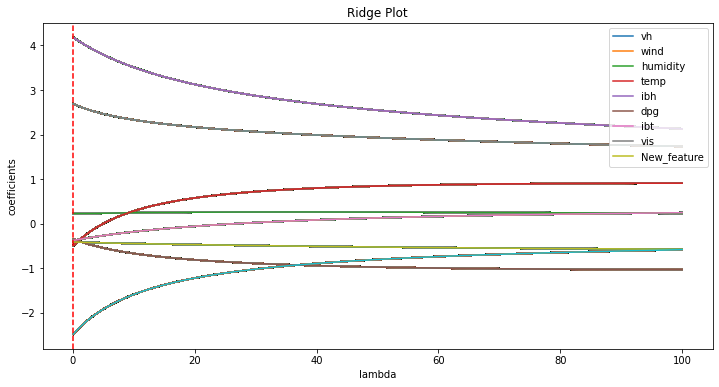

In [20]:
from itertools import cycle
lab1 = ['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis', 'New_feature']
plt.figure(figsize=(12,6))
for i in range(0,len(lambda_list)):
    plt.plot(lambda_list,beta_ridge, label=lab1)
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Ridge Plot')
plt.axis('tight')
plt.legend(lab1,loc=1,prop={'size': 10})
plt.axvline(x=(best_lambda), color = 'red', linestyle='--')
plt.show()

**Above is a ridge plot which shows lambdas versus the coefficents for each feature. The red line indicates the lambda that was used for predicting the test data**

### **Part C: Lasso Regression**

In [21]:
from sklearn import linear_model

In [22]:
from sklearn.linear_model import lasso_path
eps = 5e-3
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps)
neg_log_alphas_lasso = -np.log10(alphas_lasso)

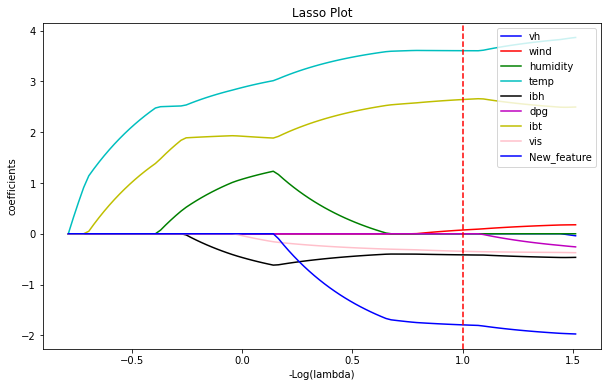

In [23]:
lab = ['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis', 'New_feature']
plt.figure(figsize=(10,6))
colors = cycle(['b', 'r', 'g', 'c', 'k', 'm', 'y', 'pink'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
  l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c, label=lab)
plt.xlabel('-Log(lambda)')
plt.ylabel('coefficients')
plt.title('Lasso Plot')
plt.axis('tight')
plt.legend(lab,loc=1,prop={'size': 10})
plt.axvline(x=(-np.log10(best_lambda)), color = 'red', linestyle='--')
plt.show()

**Above is a lasso plot of the train data, which graphs the -log of the lambdas versus the coefficients for each feature. Just as before the redline indicates the best lambda that was used for predicting the test data. The code for the graph is based off the following link: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html**

**Selected features and why they make sense**

The features selected by this lasso plot are **temperature, ibt, humidity, and wind**. These features makes sense to have been selected as temperature is known for having a strong correlation with ozone levels. Higher temperature leads to higher ozone. After doing research I have also discovered that ibt (Inversion Base Temperature) has a large impact on how polluted the air is, so this will correlate to higher ozone. As for humidity and wind the data is a little more wild, but researchers suggest that these as well have an impact on ozone levels. 


In [24]:
reg = linear_model.Lasso(alpha=best_lambda)
reg.fit(X_train, y_train)


pred5 = reg.predict(X_test)

print(np.concatenate((pred5.reshape(len(pred5),1), y_test.reshape(len(y_test),1)),1))
print("MSE: ", mean_squared_error(y_test, pred5))

[[ 7.95446526  4.        ]
 [24.24952907 30.        ]
 [16.05462683 19.        ]
 [17.72358102 17.        ]
 [ 9.38435626 12.        ]
 [17.86931413 19.        ]
 [14.1015242  15.        ]
 [ 5.14558048  5.        ]
 [11.26040272  6.        ]
 [11.62715851  5.        ]
 [13.02783983 14.        ]
 [20.61930826 24.        ]
 [ 7.27402213  5.        ]
 [ 3.60578284  1.        ]
 [ 6.8083629   6.        ]
 [ 7.75185668 10.        ]
 [14.29207422 18.        ]
 [ 9.37451654 10.        ]
 [ 2.79221524  4.        ]
 [ 8.3860946  10.        ]
 [15.75677938 14.        ]
 [21.69957035 28.        ]
 [ 5.58739371  7.        ]
 [ 8.94392137  7.        ]
 [19.97500452 25.        ]
 [ 0.34782535  6.        ]
 [20.28736706 26.        ]
 [22.40958994 24.        ]
 [ 3.48083514  4.        ]
 [20.25513282 23.        ]
 [ 4.22530241  9.        ]
 [ 1.21691913  4.        ]
 [18.44079684 14.        ]]
MSE:  11.687135989975504


**Above again is a table that compares the predicted with the actual values for the lasso method. As seen the predictions are fairly close. The MSE is smaller than the baseline MSE, so lasso good model to use for the dataset. The lasso method MSE is very similar to the ridge regression MSEs. Overall lasso seems like the best model to use for this dataset.**

**The new feature added seems to have made the MSE for all 3 methods slightly better. This makes sense because the temperature and humidity definitly have some relationship so taking their ratio definitly has a chance to improve the error**